In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
import altair as alt
import datetime as dt

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf  # for data
from pandas_datareader import data as pdr
yf.pdr_override()

In [227]:
def read_data(stock='AAPL'):


    df = pdr.get_data_yahoo(stock,period = "7d",

            # fetch data by interval (including intraday if period < 60 days)
            # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
            # (optional, default is '1d')
            interval = "15m",)


    return df

In [229]:
df = read_data(stock='AAPL').reset_index()

[*********************100%***********************]  1 of 1 completed


In [230]:
df

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2020-10-27 09:30:00-04:00,115.489998,115.830002,114.660004,115.355003,115.355003,7970737
1,2020-10-27 09:45:00-04:00,115.360001,116.029999,114.961502,116.000000,116.000000,5291182
2,2020-10-27 10:00:00-04:00,116.014999,116.449997,115.860001,115.970001,115.970001,5062601
3,2020-10-27 10:15:00-04:00,115.963097,116.050003,115.449997,115.839996,115.839996,4067641
4,2020-10-27 10:30:00-04:00,115.840202,116.125000,115.660103,115.800003,115.800003,2656236
...,...,...,...,...,...,...,...
177,2020-11-04 14:45:00-05:00,114.650002,115.169998,114.635002,115.029999,115.029999,2957593
178,2020-11-04 15:00:00-05:00,115.035004,115.349998,114.820000,115.054497,115.054497,3123536
179,2020-11-04 15:15:00-05:00,115.050003,115.059998,114.570000,114.772400,114.772400,3760082
180,2020-11-04 15:30:00-05:00,114.775002,115.099998,114.680000,114.860001,114.860001,3923812


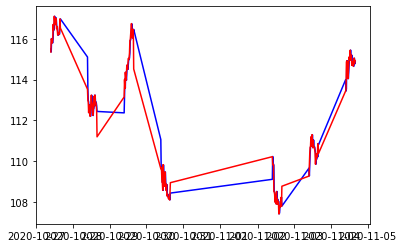

In [231]:
plt.plot(df['Datetime'],df['Open'],'b')
plt.plot(df['Datetime'],df['Adj Close'],'r');

In [232]:
df['High'] = df['High'].shift(1)
df['Low'] = df['Low'].shift(1)
df['Volume'] = df['Volume'].shift(1)

In [233]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Datetime']=df['Datetime'].map(dt.datetime.toordinal)

In [234]:
df

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,737725,115.489998,NaN,NaN,115.355003,115.355003,NaN
1,737725,115.360001,115.830002,114.660004,116.000000,116.000000,7970737.0
2,737725,116.014999,116.029999,114.961502,115.970001,115.970001,5291182.0
3,737725,115.963097,116.449997,115.860001,115.839996,115.839996,5062601.0
4,737725,115.840202,116.050003,115.449997,115.800003,115.800003,4067641.0
...,...,...,...,...,...,...,...
177,737733,114.650002,115.010002,114.470001,115.029999,115.029999,2855836.0
178,737733,115.035004,115.169998,114.635002,115.054497,115.054497,2957593.0
179,737733,115.050003,115.349998,114.820000,114.772400,114.772400,3123536.0
180,737733,114.775002,115.059998,114.570000,114.860001,114.860001,3760082.0


In [235]:
df['SMA'] = df['Adj Close'].rolling(window = 20).mean()
df['Middle Band'] =df['Adj Close'].rolling(window=20).mean()
df['Upper Band'] = df['Middle Band'] + 1.96*df['Adj Close'].rolling(window=20).std()
df['Lower Band'] = df['Middle Band'] - 1.96*df['Adj Close'].rolling(window=20).std()
df['status_lower'] = np.where(df['Adj Close'] < df['Lower Band'],'below_ballinger','normal')
df['status_upper'] = np.where(df['Adj Close'] > df['Upper Band'],'above_ballinger','normal')

In [236]:
df = df.dropna()

In [237]:
df = df.drop(columns = ['Close'])
y = df['Adj Close']
X = df.drop(columns =['Adj Close','Volume' ,'Low','High'] )

In [238]:
from sklearn.model_selection import train_test_split


In [239]:
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle= False) 

In [240]:
X_train

,Datetime,Open,SMA,Middle Band,Upper Band,Lower Band,status_lower,status_upper
19,737725,116.180000,116.395960,116.395960,117.295059,115.496861,normal,normal
20,737725,116.290001,116.438970,116.438970,117.206051,115.671888,normal,normal
21,737725,116.209999,116.449720,116.449720,117.197469,115.701971,normal,normal
22,737725,116.220001,116.462989,116.462989,117.184913,115.741066,normal,normal
23,737725,116.239998,116.501490,116.501490,117.165625,115.837354,normal,normal
...,...,...,...,...,...,...,...,...
136,737732,111.190002,108.799905,108.799905,111.333280,106.266529,normal,normal
137,737732,110.750000,108.937234,108.937234,111.607163,106.267306,normal,normal
138,737732,110.889999,109.107004,109.107004,111.922139,106.291869,normal,normal
139,737732,111.294998,109.250254,109.250254,112.125223,106.375285,normal,normal


In [241]:
# first transformer for the numeric features
numeric_features = list(set(list(X_train.columns)) - set(['status_lower','status_upper']))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
   ])
# now a taransformer for the categorical features
categorical_features = ['status_lower','status_upper']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
# creating a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

ridge_model = Ridge()
# include the preprocessor and the model in one pipeline.
# Now we have a full prediction pipeline.
reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('Regressor', ridge_model)])

# finally we will pass the pipe line to gridsearchcv to find the optimum paramters for the model
param_grid = {
    'Regressor__alpha':[0.1,0.25,0.4],
}
search = GridSearchCV(reg_pipeline,param_grid,cv = 5)

# fitting the model
search.fit(X_train, y_train)

# printing the first parameter
print(search.best_params_)
print("model score: %.3f" % search.score(X_test, y_test))

{'Regressor__alpha': 0.1}
model score: 0.957


In [242]:
y_pred = search.predict(X_test)

In [243]:
from sklearn.metrics import mean_squared_error



In [244]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.43571758738630656

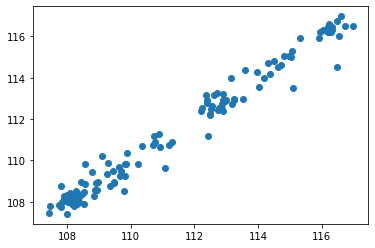

In [245]:
plt.scatter(X_train['Open'],y_train)


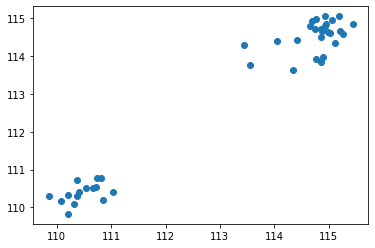

In [246]:
plt.scatter(y_test,y_pred)

In [247]:
X_test['actual'] = y_test
X_test['pred'] = y_pred



<ipython-input-247-d1d29585976d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['actual'] = y_test
<ipython-input-247-d1d29585976d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['pred'] = y_pred


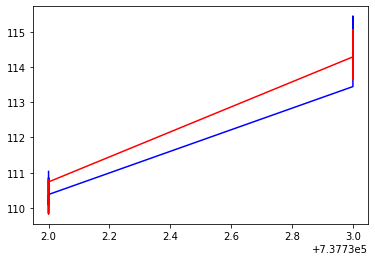

In [248]:
plt.plot(X_test['Datetime'],X_test['actual'],'b')
plt.plot(X_test['Datetime'],X_test['pred'],'r')

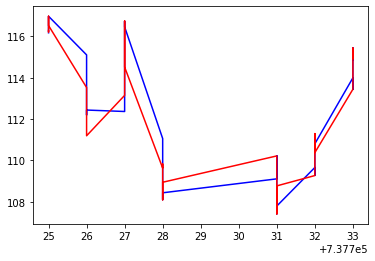

In [249]:
plt.plot(df['Datetime'],df['Open'],'b')
plt.plot(df['Datetime'],df['Adj Close'],'r')

In [ ]:
# let's make a function

In [ ]:
df['High'] = df['High'].shift(1)
df['Low'] = df['Low'].shift(1)
df['Volume'] = df['Volume'].shift(1)

In [250]:
X_train

,Datetime,Open,SMA,Middle Band,Upper Band,Lower Band,status_lower,status_upper
19,737725,116.180000,116.395960,116.395960,117.295059,115.496861,normal,normal
20,737725,116.290001,116.438970,116.438970,117.206051,115.671888,normal,normal
21,737725,116.209999,116.449720,116.449720,117.197469,115.701971,normal,normal
22,737725,116.220001,116.462989,116.462989,117.184913,115.741066,normal,normal
23,737725,116.239998,116.501490,116.501490,117.165625,115.837354,normal,normal
...,...,...,...,...,...,...,...,...
136,737732,111.190002,108.799905,108.799905,111.333280,106.266529,normal,normal
137,737732,110.750000,108.937234,108.937234,111.607163,106.267306,normal,normal
138,737732,110.889999,109.107004,109.107004,111.922139,106.291869,normal,normal
139,737732,111.294998,109.250254,109.250254,112.125223,106.375285,normal,normal


In [251]:
one_sample = X_train[-1:]

In [252]:
search.predict(one_sample)


array([110.61802849])

In [279]:
# next step is to handle data that come continously and predict